In [ ]:
#Install spacy library for natural language processing tasks
!pip install spacy
#Install matplotlib library for creating plots and visualizations
!pip install matplotlib
#Install wordcloud library for generating word cloud visualizations
!pip install wordcloud
#Install textstat library for calculating text readability scores
!pip install textstat
#Install jax and jaxlib libraries for numerical computing
!pip install jax jaxlib
# Upgrade jax and jaxlib libraries to the latest version
!pip install --upgrade jax jaxlib

Enter file extension for analysis. If more than one file needs analysis, use a comma to separate (e.g., Speech1.txt, Speech2.txt): Biden.txt
Enter a word to search in the speeches (press Enter to skip): 
Speech: Biden.txt
Word Count: 9231
Average Word Length: 4.83
Average Sentence Length: 18.95
Top 10 Words (excluding articles and conjunctions):
going: 47
let: 45
people: 39
know: 37
america: 36
years: 32
american: 31
president: 30
law: 30
year: 26
Readability Score: 74.49



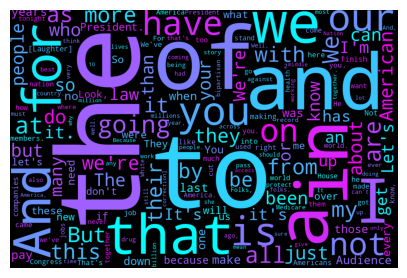

In [23]:
# Siya Behl
# CMSC 206 Project 4
# The following program specific to colab allows for analysis of any speech that is uploaded to the environment by the user.
# It also allows the user to conduct searches for words in the speech.

# Import for operating system related functions
import os
# Import for counting occurrences of elements
from collections import Counter
# Import for creating plots and visualizations
import matplotlib.pyplot as plt
# Import for generating word cloud visualizations
from wordcloud import WordCloud
# Import for calculating text readability scores
import textstat


# Function to process a speech file and return its content as a string
def file_contents(file_name):
    with open(file_name, 'r') as file:
        return file.read()

# Function to calculate word count and average word length
def calc_word_count_and_length(text):
    # Splits the text into individual words with whitespace as delimiter
    words = text.split()
    # Counts the number of words
    word_count = len(words)
    # Calculates the total length of all words by calculating the sum of the lengths of each word
    word_length = sum(len(word) for word in words)
    # Calculates the average word length by dividing the total length by the number of words
    average_word_len = word_length / word_count if word_count else 0
    # Returns the word count and average word length
    return word_count, average_word_len

# Function to calculate average sentence length
def calc_sentence_len(text):
    # Splits the text into individual sentences using the period followed by a space as the delimiter
    sentences = text.split('. ')
    if sentences:
        # Calculates the average sentence length by dividing the total number of words in sentences by the number of sentences
        # Works with the case of no sentences
        return sum(len(sentence.split()) for sentence in sentences) / len(sentences)
    return 0

# Function to generate word cloud
def WC_visualization(text):
    # Counts frequency of each word in the text
    word_frequencies = Counter(text.split())
    # Generates a word cloud visualization from the word frequencies, with customized appearance
    wordcloud = WordCloud(width=1200, height=800, background_color='black', colormap='cool', max_words=200).generate_from_frequencies(word_frequencies)
    # Creates a figure and sets the size
    plt.figure(figsize=(5, 5))
    # Displays the word cloud image
    plt.imshow(wordcloud)
    # Turns off the axis
    plt.axis('off')
    # Shows the plot
    plt.show()

# Function to analyze and display stats of a speech
def process(file_name):
    # Import spacy module locally within the function
    import spacy
    #Reads contents of the speech file
    content = file_contents(file_name)
    #Processes content with spaCy
    doc = spacy.load('en_core_web_sm')(content)
    #Extracts lowercase words from the processed document, excluding stop words and non-alphabetic tokens
    words = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]
    #Counts frequency of each word
    word_frequency = Counter(words)
    #Gets the top 10 most common words and their frequencies
    top_10_words = word_frequency.most_common(10)
    print(f"Speech: {file_name}")
    word_count, average_word_len = calc_word_count_and_length(content)
    print(f"Word Count: {word_count}")
    print(f"Average Word Length: {average_word_len:.2f}")
    print(f"Average Sentence Length: {calc_sentence_len(content):.2f}")
    print("Top 10 Words (excluding articles and conjunctions):")
    for word, count in top_10_words:
        print(f"{word}: {count}")
    print(f"Readability Score: {textstat.flesch_reading_ease(content):.2f}")
    print("")
    #Generates and displays the word cloud visualization
    WC_visualization(content)
    return word_frequency

#Main function to initialize the code
def main():
    #Prompts the user to enter input for file names of the speeches to analyze
    file_names = input("Enter file extension for analysis. If more than one file needs analysis, use a comma to separate (e.g., Speech1.txt, Speech2.txt): ").split(',')
    #ENHANCEMENT FEATURE:
    #Allows user to enter a word to search for in the speech and to see how frequently it has been used
    search_word = input("Enter a word to search in the speeches (press Enter to skip): ")
    if search_word:
        search_word = search_word.lower()
    for file_name in file_names:
        word_frequency = process(file_name.strip())
        if search_word:
            # Get the frequency of the search word, handling the case of the word not being found
            search_word_frequency = word_frequency.get(search_word, 0)
            print(f"Frequency of '{search_word}' in {file_name}: {search_word_frequency}")
            print("")

# Runs the main function
if __name__ == '__main__':
    main()

